<a href="https://colab.research.google.com/github/aabarzu/Coding-Dojo/blob/main/EjerciciosdeACP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Montar Drive**

In [3]:
from google.colab import drive
drive.mount('/content/drive',  force_remount=True) #  force_remount=True , pide eso no sé porqué

Mounted at /content/drive


# **Importación de Librerías**

## **Librerias Panda y Visualización**

In [9]:
import pandas as pd
from pandas.core.frame import DataFrame

import matplotlib.pyplot as plt #from matplotlib import pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns

import missingno as msno
import numpy as np

sns.set_theme()


## **Librerias Machine Learning**

In [10]:
# LIBRERIAS MACHINE LEARNING

from sklearn                 import metrics                # Metricas (Matriz de Confunsión)

from sklearn.linear_model    import LogisticRegression     # Regresión Logistica
from sklearn.linear_model    import LinearRegression       # Regresión Lineal

from sklearn.neighbors       import KNeighborsClassifier   # Knn como clasificador
from sklearn.neighbors       import KNeighborsRegressor    # Knn como Regresor

from sklearn.tree            import DecisionTreeClassifier # Arboles de Decisión Clasificador
from sklearn.tree            import DecisionTreeRegressor  # Arboles de Decisión Regresor

from sklearn.ensemble        import BaggingClassifier      # Bagging and pasting Classifier
from sklearn.ensemble        import BaggingRegressor       # Bagging and pasting Regressor 

from sklearn.ensemble        import RandomForestClassifier # Bosques aleatorios (Random Forests)
from sklearn.ensemble        import RandomForestRegressor  # Bosques aleatorios (Random Forests) Regres

from sklearn.model_selection import GridSearchCV           # Grid Search Cross Validation
from sklearn.model_selection import RandomizedSearchCV     # Para Pruebas Random

from sklearn.model_selection import train_test_split       # Para dividir las pruebas

from sklearn                 import tree                   # Grficar Arboles

# PARA OBTENER METRICAS

from sklearn.metrics         import mean_absolute_error    # Error absoluto medio (MAE)
from sklearn.metrics         import mean_squared_error     # Error cuadrático medio (MSE) y Raíz del error cuadrático medio (RMSE)
from sklearn.metrics         import r2_score               # Determinar el r2 score

#Transformacion de Datos scalar, normalizar y standarizacion OneHotencoding LabelEncoder 

from sklearn.preprocessing    import LabelEncoder          # Definir clasificación de una columna Texto Variables Categoricas
from sklearn.preprocessing    import StandardScaler        # Standarización de Datos
from sklearn.preprocessing    import OneHotEncoder         # OneHotEncoder 

from sklearn.linear_model     import Ridge
from sklearn.metrics          import roc_auc_score, plot_roc_curve ,accuracy_score


# **Carga de Datos**

In [4]:

# cargar el conjunto de datos
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784' , as_frame=True)
# ver la forma del conjunto de datos


In [5]:
df = mnist.frame

In [13]:
df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [11]:

df["class"] = pd.to_numeric(df["class"])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel1 to class
dtypes: float64(784), int64(1)
memory usage: 419.2 MB


# **Información de los Datos**


In [ ]:
df.head() 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: float64(784)
memory usage: 418.7 MB


# **Verificar Datos Nulos isna**

In [14]:
df.isna().sum()

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel781    0
pixel782    0
pixel783    0
pixel784    0
class       0
Length: 785, dtype: int64

# **Filtrado de Datos**

In [15]:
# Filtrado de DataFrame

#Condiciones
#filtro_datos_1 = df['Campo1'] == '<CONDICICION>'
#filtro_datos_2 = df['Campo1'] == '<CONDICICION>'

#Filtro final con las condiciones
#filtro_final = ( filtro_datos_1 & filtro_datos_1 )

#df_valores = df[filtro_final] 

df_valores = df.copy()


**Cambiar los campos tipo fecha a Numeros , los modelos siempre tabrajan mejor con números, Usar LabelEncoder , OneHotEncoder**

In [ ]:
#df_valores['Sex'] = df_valores.Sex.map({'M': 0,'F': 1, 'I':2})
#df_valores['Sex'] = df_valores['Sex'].map({'M': 0,'F': 1, 'I':2})
#df

# **Gráfico inicial**


In [ ]:
# **Gráfico inicial**
#

**Obtención de Datos X e y**

In [164]:
df_valores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: float64(784)
memory usage: 418.7 MB


In [30]:
# values los deja como arreglo , pero se pueden usar los dataframe Directos, pero existen librerias que solo usan array numpys ojo 

# Forma 1 cuando son pocas columnas para el loc
#X = df_valores.loc[:, ['campo1','campo2','campo3','campo4']]    #.values

# Forma 2 cuando debo eliminar pocas columnas y deben quedar muchas columnas en el data frame
X = df_valores.drop(columns=['class']).values 

# Forma 3 Parecido a parte 1 , en el loc se podría usar un filtro. Ojo
#X = df_valores[['campo1','campo2','campo3','campo4']]  #.values


X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
X.shape

(70000, 784)

In [32]:
y = df['class'].values
y

array([5, 0, 4, ..., 4, 5, 6])

In [33]:
y.shape

(70000,)

# **Aplicación del Algún método**


In [34]:
from sklearn.decomposition import PCA

X = X /255.0
# Instanciar Escalador Estándar
#scaler = StandardScaler()

# Ajustar y transformar datos

#X_train_sc = scaler.fit_transform(X_train)
#X_test_sc = scaler.transform(X_test)





In [54]:
# Ajustar PCA

n_components = 323
score       =  0

for  n_components in range(320, 325, 1):

#while score <= 95.0:
 
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42 , test_size=0.2, stratify=y)  

  pca = PCA(n_components=n_components)

  X_train_pca = pca.fit_transform(X_train)
  X_test_pca  = pca.transform(X_test)

  # ajustar regresión logística

  logreg = LogisticRegression(solver='lbfgs', max_iter=10000)
  logreg.fit(X_train_pca , y_train)


  score = round( logreg.score(X_test_pca, y_test) * 100.0 , 4 )
  print(f"score {score} n_components={n_components}")
  n_components += 1
  


CPU times: user 6 µs, sys: 2 µs, total: 8 µs
Wall time: 8.34 µs
score 92.1286 n_components=300
CPU times: user 7 µs, sys: 2 µs, total: 9 µs
Wall time: 9.3 µs
score 92.0929 n_components=301
CPU times: user 6 µs, sys: 2 µs, total: 8 µs
Wall time: 8.82 µs
score 92.1643 n_components=302


KeyboardInterrupt: ignored

In [ ]:
# Ajustar PCA CON TODAS LAS CARACTERISTICAS

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42 , test_size=0.2, stratify=y)

pca = PCA()

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

logreg = LogisticRegression(solver='lbfgs', max_iter=10000)
logreg.fit(X_train_pca , y_train)

score = round( logreg.score(X_test_pca, y_test) * 100.0 , 4 )
score



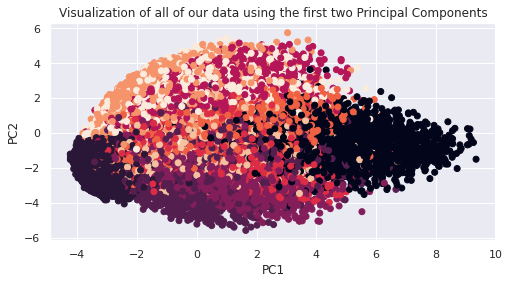

In [57]:
# Visualiza los primeros 2 PC
plt.figure(figsize = (8, 4))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train)
plt.title('Visualization of all of our data using the first two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2');

# **Grafico análisis Final**